In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
eco = pd.read_excel('../data/TEIS-NSS Project Data 10-2022.xlsx',sheet_name=('ECO with Exit21-22'))

In [3]:
elig = pd.read_excel('../data/TEIS-NSS Project Data 10-2022.xlsx',sheet_name=('Elig Timeline Rpt 2018-2022'))

In [4]:
eco.head()

,DISTRICT,CHILD_ID,ECO_Entry_DATE,Ent SOCIAL_SCALE,Ent KNOWLEDGE_SCALE,Ent APPROPRIATE_ACTION_SCALE,ECO_Exit_DATE,Exit SOCIAL_SCALE,Exit KNOWLEDGE_SCALE,Exit APPROPRIATE_ACTION_SCALE,...,OC2 Data Check,OC3 - a,OC3 - b,OC3 - c,OC3 - d,OC3 - e,OC3 Data Check,Days btw Initial and Exit,Days btw I-IFSP to Exit ECO,Days btw I-IFSP to entry ECO
0,ET,500335.0,2021-04-23,5.0,3.0,4.0,2021-10-23,6.0,3.0,4.0,...,1.0,NaN,1.0,NaN,NaN,NaN,1.0,206.0,183.0,0.0
1,ET,479453.0,2020-03-23,7.0,7.0,7.0,2021-08-19,7.0,7.0,7.0,...,1.0,NaN,NaN,NaN,NaN,1.0,1.0,704.0,514.0,0.0
2,ET,510663.0,NaT,NaN,NaN,NaN,NaT,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,0.0,115.0,-44483.0,-44483.0
3,ET,452482.0,2019-01-31,2.0,3.0,3.0,2021-11-22,5.0,3.0,5.0,...,1.0,NaN,NaN,1.0,NaN,NaN,1.0,1053.0,1026.0,0.0
4,ET,506507.0,NaT,NaN,NaN,NaN,NaT,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,0.0,159.0,-44434.0,-44434.0


In [5]:
print(eco.dtypes)

DISTRICT                                        object
CHILD_ID                                       float64
ECO_Entry_DATE                          datetime64[ns]
Ent SOCIAL_SCALE                               float64
Ent KNOWLEDGE_SCALE                            float64
Ent APPROPRIATE_ACTION_SCALE                   float64
ECO_Exit_DATE                           datetime64[ns]
Exit SOCIAL_SCALE                              float64
Exit KNOWLEDGE_SCALE                           float64
Exit APPROPRIATE_ACTION_SCALE                  float64
ExitIS_SOCIAL_PROGRESS                          object
ExitIS_KNOWLEDGE_PROGRESS                       object
ExitIS_APPROPRIATE_ACTION_PROGRESS              object
Initial IFSP Date                       datetime64[ns]
Exit Reason                                     object
Exit Date                               datetime64[ns]
<Lookup> Expected Rating                        object
<Calc> Months in Program                       float64
<Calc> Ent

In [6]:
print(elig.dtypes)

District                                                    object
Child ID                                                     int64
Child Status                                                object
Child Phase                                                 object
Init. IFSP Due Date                                 datetime64[ns]
IFSP Due Date                                       datetime64[ns]
IFSP Late Reason                                            object
Active Ref. Date                                    datetime64[ns]
Parent Consent/Intake Date                          datetime64[ns]
Date Dev. Evaluator Rec'd. Ref.                             object
Date Assigned to Dev. Evaluator                             object
Dates Dev. Evaluator Attempted to Contact Family            object
Date Dev. Evaluator Actually Contacted Family               object
Dates Med. Records Requested                                object
Date Med. Records Rec'd                                     ob

In [7]:
elig.head()

,District,Child ID,Child Status,Child Phase,Init. IFSP Due Date,IFSP Due Date,IFSP Late Reason,Active Ref. Date,Parent Consent/Intake Date,Date Dev. Evaluator Rec'd. Ref.,...,# Days Parent Consent to Dev. Eval.,# Days Dev. Evaluator Assigned to Dev. Eval.,1st Date Requested to Receipt of Med. Records,# Days Dev. Eval. to Elig. Det.,# Days Ref. to Elig. Det.,Init. Elig. Decision,Init. Elig. Category,Init. Elig. Det. Date,Exit Date,Exit Reason
0,ET,453926,Inactive,IFSP,2019-03-04,2019-03-27,System,2019-01-18,2019-02-04,2019-01-22 00:00:00,...,17.0,30.0,NaN,4.0,38.0,Eligible,Developmental Evaluation,2019-02-25,2020-01-11,618 - Part B eligible
1,ET,431729,Inactive,IFSP,2018-10-26,2018-10-26,NaN,2018-09-11,2018-09-25,2018-09-12 00:00:00,...,0.0,13.0,NaN,6.0,20.0,Eligible,"Diagnosed Condition, Developmental Evaluation",2018-10-01,2020-12-11,618 - Part B eligibility not determined
2,ET,462474,Inactive,IFSP,2019-06-28,2019-06-14,NaN,2019-05-14,2019-05-30,2019-05-15 00:00:00,...,0.0,15.0,0.0,1.0,17.0,Eligible,Developmental Evaluation,2019-05-31,2020-11-12,618 - Part B eligibility not determined
3,ET,446841,Inactive,Eligibility,2018-11-23,NaT,NaN,2018-10-09,2018-10-25,2018-10-11 00:00:00,...,0.0,14.0,NaN,1.0,17.0,Eligible,Diagnosed Condition,2018-10-26,2020-08-12,Parent decline
4,ET,459629,Inactive,IFSP,2019-05-16,2019-04-24,NaN,2019-04-01,2019-04-10,2019-04-02 00:00:00,...,0.0,8.0,0.0,2.0,11.0,Eligible,Developmental Evaluation,2019-04-12,2019-09-26,618 - Parent withdraw


In [8]:
 elig.astype({"Child ID": 'float'})

,District,Child ID,Child Status,Child Phase,Init. IFSP Due Date,IFSP Due Date,IFSP Late Reason,Active Ref. Date,Parent Consent/Intake Date,Date Dev. Evaluator Rec'd. Ref.,...,# Days Parent Consent to Dev. Eval.,# Days Dev. Evaluator Assigned to Dev. Eval.,1st Date Requested to Receipt of Med. Records,# Days Dev. Eval. to Elig. Det.,# Days Ref. to Elig. Det.,Init. Elig. Decision,Init. Elig. Category,Init. Elig. Det. Date,Exit Date,Exit Reason
0,ET,453926.0,Inactive,IFSP,2019-03-04,2019-03-27,System,2019-01-18,2019-02-04,2019-01-22 00:00:00,...,17.0,30.0,NaN,4.0,38.0,Eligible,Developmental Evaluation,2019-02-25,2020-01-11,618 - Part B eligible
1,ET,431729.0,Inactive,IFSP,2018-10-26,2018-10-26,NaN,2018-09-11,2018-09-25,2018-09-12 00:00:00,...,0.0,13.0,NaN,6.0,20.0,Eligible,"Diagnosed Condition, Developmental Evaluation",2018-10-01,2020-12-11,618 - Part B eligibility not determined
2,ET,462474.0,Inactive,IFSP,2019-06-28,2019-06-14,NaN,2019-05-14,2019-05-30,2019-05-15 00:00:00,...,0.0,15.0,0.0,1.0,17.0,Eligible,Developmental Evaluation,2019-05-31,2020-11-12,618 - Part B eligibility not determined
3,ET,446841.0,Inactive,Eligibility,2018-11-23,NaT,NaN,2018-10-09,2018-10-25,2018-10-11 00:00:00,...,0.0,14.0,NaN,1.0,17.0,Eligible,Diagnosed Condition,2018-10-26,2020-08-12,Parent decline
4,ET,459629.0,Inactive,IFSP,2019-05-16,2019-04-24,NaN,2019-04-01,2019-04-10,2019-04-02 00:00:00,...,0.0,8.0,0.0,2.0,11.0,Eligible,Developmental Evaluation,2019-04-12,2019-09-26,618 - Parent withdraw
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67605,UC,509553.0,Inactive,IFSP,2021-10-03,2021-10-22,System,2021-08-19,2021-08-26,2021-08-23 00:00:00,...,0.0,3.0,35.0,47.0,54.0,Eligible,"Diagnosed Condition, Developmental Evaluation",2021-10-12,2021-12-10,618 - Moved out of state
67606,UC,509684.0,Inactive,IFSP,2021-10-07,2021-09-07,NaN,2021-08-23,2021-08-31,2021-08-24 00:00:00,...,0.0,7.0,0.0,2.0,10.0,Eligible,Developmental Evaluation,2021-09-02,2022-03-07,618 - Parent withdraw
67607,UC,526338.0,Inactive,IFSP,2022-05-22,2022-05-05,NaN,2022-04-07,2022-04-10,2022-04-08 00:00:00,...,1.0,3.0,0.0,2.0,6.0,Eligible,Developmental Evaluation,2022-04-13,2022-07-25,618 - Parent withdraw
67608,UC,511641.0,Inactive,Eligibility,2021-11-22,NaT,NaN,2021-10-08,2021-10-18,2021-10-11 00:00:00,...,0.0,7.0,NaN,11.0,21.0,Eligible,Diagnosed Condition,2021-10-29,2022-06-22,Parent decline


In [9]:
print(elig.dtypes)

District                                                    object
Child ID                                                     int64
Child Status                                                object
Child Phase                                                 object
Init. IFSP Due Date                                 datetime64[ns]
IFSP Due Date                                       datetime64[ns]
IFSP Late Reason                                            object
Active Ref. Date                                    datetime64[ns]
Parent Consent/Intake Date                          datetime64[ns]
Date Dev. Evaluator Rec'd. Ref.                             object
Date Assigned to Dev. Evaluator                             object
Dates Dev. Evaluator Attempted to Contact Family            object
Date Dev. Evaluator Actually Contacted Family               object
Dates Med. Records Requested                                object
Date Med. Records Rec'd                                     ob

In [10]:
eco.rename(columns={'DISTRICT':'District'}, inplace=True)
eco.rename(columns={'CHILD_ID':'Child ID'}, inplace=True)
print(eco)

                                               District  Child ID  \
0                                                    ET  500335.0   
1                                                    ET  479453.0   
2                                                    ET  510663.0   
3                                                    ET  452482.0   
4                                                    ET  506507.0   
...                                                 ...       ...   
8631                                                 UC  514216.0   
8632                                                NaN       NaN   
8633                                                NaN       NaN   
8634                                                NaN       NaN   
8635  9/29/22 JM Corrected in TEIDS. Progress would ...       NaN   

     ECO_Entry_DATE  Ent SOCIAL_SCALE  Ent KNOWLEDGE_SCALE  \
0        2021-04-23               5.0                  3.0   
1        2020-03-23               7.0          

In [11]:
outer_merged = pd.merge(eco, elig, how="outer", on=["District", "Child ID"])
outer_merged.head()
outer_merged.shape
print(outer_merged)

      District  Child ID ECO_Entry_DATE  Ent SOCIAL_SCALE  \
0           ET  500335.0     2021-04-23               5.0   
1           ET  479453.0     2020-03-23               7.0   
2           ET  510663.0            NaT               NaN   
3           ET  452482.0     2019-01-31               2.0   
4           ET  506507.0            NaT               NaN   
...        ...       ...            ...               ...   
67618       UC  514221.0            NaT               NaN   
67619       UC  525915.0            NaT               NaN   
67620       UC  516841.0            NaT               NaN   
67621       UC  526338.0            NaT               NaN   
67622       UC  511641.0            NaT               NaN   

       Ent KNOWLEDGE_SCALE  Ent APPROPRIATE_ACTION_SCALE ECO_Exit_DATE  \
0                      3.0                           4.0    2021-10-23   
1                      7.0                           7.0    2021-08-19   
2                      NaN                   

In [12]:
outer_merged.rename(columns={'District':'district'}, inplace=True)
outer_merged.rename(columns={'Child ID':'child_id'}, inplace=True)
outer_merged.shape
print(outer_merged)

      district  child_id ECO_Entry_DATE  Ent SOCIAL_SCALE  \
0           ET  500335.0     2021-04-23               5.0   
1           ET  479453.0     2020-03-23               7.0   
2           ET  510663.0            NaT               NaN   
3           ET  452482.0     2019-01-31               2.0   
4           ET  506507.0            NaT               NaN   
...        ...       ...            ...               ...   
67618       UC  514221.0            NaT               NaN   
67619       UC  525915.0            NaT               NaN   
67620       UC  516841.0            NaT               NaN   
67621       UC  526338.0            NaT               NaN   
67622       UC  511641.0            NaT               NaN   

       Ent KNOWLEDGE_SCALE  Ent APPROPRIATE_ACTION_SCALE ECO_Exit_DATE  \
0                      3.0                           4.0    2021-10-23   
1                      7.0                           7.0    2021-08-19   
2                      NaN                   

In [13]:
outer_m = outer_merged[['child_id','district','<Calc> Months in Program','Ent SOCIAL_SCALE','Ent KNOWLEDGE_SCALE','Ent APPROPRIATE_ACTION_SCALE','Exit SOCIAL_SCALE','Exit KNOWLEDGE_SCALE','Exit APPROPRIATE_ACTION_SCALE','Init. Elig. Category','OC1 Data Check']]
display(outer_m)

,child_id,district,<Calc> Months in Program,Ent SOCIAL_SCALE,Ent KNOWLEDGE_SCALE,Ent APPROPRIATE_ACTION_SCALE,Exit SOCIAL_SCALE,Exit KNOWLEDGE_SCALE,Exit APPROPRIATE_ACTION_SCALE,Init. Elig. Category,OC1 Data Check
0,500335.0,ET,7.0,5.0,3.0,4.0,6.0,3.0,4.0,Developmental Evaluation,1.0
1,479453.0,ET,23.0,7.0,7.0,7.0,7.0,7.0,7.0,Developmental Evaluation,1.0
2,510663.0,ET,4.0,NaN,NaN,NaN,NaN,NaN,NaN,Developmental Evaluation,0.0
3,452482.0,ET,35.0,2.0,3.0,3.0,5.0,3.0,5.0,Developmental Evaluation,1.0
4,506507.0,ET,6.0,NaN,NaN,NaN,NaN,NaN,NaN,Developmental Evaluation,0.0
...,...,...,...,...,...,...,...,...,...,...,...
67618,514221.0,UC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Developmental Evaluation,NaN
67619,525915.0,UC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Developmental Evaluation,NaN
67620,516841.0,UC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Developmental Evaluation,NaN
67621,526338.0,UC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Developmental Evaluation,NaN


In [14]:
outer_m.columns = ['child_id', 'district', 'month_count', 'ent_social', 'ent_knowledge', 'ent_app_action', 'exit_social', 'exit_knowledge', 'exit_app_action','elig_cat','OC1 Data Check' ]
display(outer_m)

,child_id,district,month_count,ent_social,ent_knowledge,ent_app_action,exit_social,exit_knowledge,exit_app_action,elig_cat,OC1 Data Check
0,500335.0,ET,7.0,5.0,3.0,4.0,6.0,3.0,4.0,Developmental Evaluation,1.0
1,479453.0,ET,23.0,7.0,7.0,7.0,7.0,7.0,7.0,Developmental Evaluation,1.0
2,510663.0,ET,4.0,NaN,NaN,NaN,NaN,NaN,NaN,Developmental Evaluation,0.0
3,452482.0,ET,35.0,2.0,3.0,3.0,5.0,3.0,5.0,Developmental Evaluation,1.0
4,506507.0,ET,6.0,NaN,NaN,NaN,NaN,NaN,NaN,Developmental Evaluation,0.0
...,...,...,...,...,...,...,...,...,...,...,...
67618,514221.0,UC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Developmental Evaluation,NaN
67619,525915.0,UC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Developmental Evaluation,NaN
67620,516841.0,UC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Developmental Evaluation,NaN
67621,526338.0,UC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Developmental Evaluation,NaN


In [15]:
outer_m.head(20)

,child_id,district,month_count,ent_social,ent_knowledge,ent_app_action,exit_social,exit_knowledge,exit_app_action,elig_cat,OC1 Data Check
0,500335.0,ET,7.0,5.0,3.0,4.0,6.0,3.0,4.0,Developmental Evaluation,1.0
1,479453.0,ET,23.0,7.0,7.0,7.0,7.0,7.0,7.0,Developmental Evaluation,1.0
2,510663.0,ET,4.0,NaN,NaN,NaN,NaN,NaN,NaN,Developmental Evaluation,0.0
3,452482.0,ET,35.0,2.0,3.0,3.0,5.0,3.0,5.0,Developmental Evaluation,1.0
4,506507.0,ET,6.0,NaN,NaN,NaN,NaN,NaN,NaN,Developmental Evaluation,0.0
5,494216.0,ET,9.0,2.0,4.0,6.0,4.0,5.0,7.0,Developmental Evaluation,1.0
6,449725.0,ET,14.0,4.0,5.0,7.0,7.0,7.0,7.0,Developmental Evaluation,1.0
7,494502.0,ET,9.0,6.0,4.0,5.0,7.0,5.0,6.0,Developmental Evaluation,1.0
8,488351.0,ET,11.0,5.0,5.0,7.0,6.0,5.0,7.0,Developmental Evaluation,1.0
9,489949.0,ET,18.0,2.0,1.0,2.0,1.0,4.0,5.0,"Diagnosed Condition, Developmental Evaluation",1.0


In [16]:
outer_m2 = outer_m.dropna(how = 'any', axis=0)
display(outer_m2)

,child_id,district,month_count,ent_social,ent_knowledge,ent_app_action,exit_social,exit_knowledge,exit_app_action,elig_cat,OC1 Data Check
0,500335.0,ET,7.0,5.0,3.0,4.0,6.0,3.0,4.0,Developmental Evaluation,1.0
1,479453.0,ET,23.0,7.0,7.0,7.0,7.0,7.0,7.0,Developmental Evaluation,1.0
3,452482.0,ET,35.0,2.0,3.0,3.0,5.0,3.0,5.0,Developmental Evaluation,1.0
5,494216.0,ET,9.0,2.0,4.0,6.0,4.0,5.0,7.0,Developmental Evaluation,1.0
6,449725.0,ET,14.0,4.0,5.0,7.0,7.0,7.0,7.0,Developmental Evaluation,1.0
...,...,...,...,...,...,...,...,...,...,...,...
8624,490337.0,UC,14.0,3.0,1.0,1.0,3.0,3.0,1.0,"Diagnosed Condition, Developmental Evaluation",1.0
8626,483729.0,UC,14.0,1.0,3.0,2.0,6.0,6.0,6.0,Developmental Evaluation,1.0
8627,485978.0,UC,12.0,1.0,3.0,5.0,5.0,7.0,7.0,Developmental Evaluation,1.0
8628,488802.0,UC,12.0,4.0,4.0,3.0,6.0,7.0,7.0,Developmental Evaluation,1.0


In [17]:
outer_m2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5717 entries, 0 to 8630
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   child_id         5717 non-null   float64
 1   district         5717 non-null   object 
 2   month_count      5717 non-null   float64
 3   ent_social       5717 non-null   float64
 4   ent_knowledge    5717 non-null   float64
 5   ent_app_action   5717 non-null   float64
 6   exit_social      5717 non-null   float64
 7   exit_knowledge   5717 non-null   float64
 8   exit_app_action  5717 non-null   float64
 9   elig_cat         5717 non-null   object 
 10  OC1 Data Check   5717 non-null   float64
dtypes: float64(9), object(2)
memory usage: 536.0+ KB


In [18]:
outer_m2['social_change'] = outer_m2['exit_social'] - outer_m2['ent_social']
outer_m2['knowledge_change'] = outer_m2['exit_knowledge'] - outer_m2['ent_knowledge']
outer_m2['app_action_change'] = outer_m2['exit_app_action'] - outer_m2['ent_app_action']


/var/folders/s_/vzlfmfg172vdq5rdfwy02xlc0000gn/T/ipykernel_27107/3739359155.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outer_m2['social_change'] = outer_m2['exit_social'] - outer_m2['ent_social']
/var/folders/s_/vzlfmfg172vdq5rdfwy02xlc0000gn/T/ipykernel_27107/3739359155.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outer_m2['knowledge_change'] = outer_m2['exit_knowledge'] - outer_m2['ent_knowledge']
/var/folders/s_/vzlfmfg172vdq5rdfwy02xlc0000gn/T/ipykernel_27107/3739359155.py:3: SettingWith

In [19]:
print(outer_m2[['ent_social','exit_social', 'social_change']].head(20))

    ent_social  exit_social  social_change
0          5.0          6.0            1.0
1          7.0          7.0            0.0
3          2.0          5.0            3.0
5          2.0          4.0            2.0
6          4.0          7.0            3.0
7          6.0          7.0            1.0
8          5.0          6.0            1.0
9          2.0          1.0           -1.0
11         3.0          7.0            4.0
13         3.0          5.0            2.0
15         1.0          7.0            6.0
16         6.0          7.0            1.0
17         2.0          2.0            0.0
18         7.0          7.0            0.0
19         2.0          5.0            3.0
21         5.0          7.0            2.0
22         5.0          5.0            0.0
23         7.0          6.0           -1.0
25         6.0          7.0            1.0
26         5.0          7.0            2.0


In [20]:
display(outer_m2)

,child_id,district,month_count,ent_social,ent_knowledge,ent_app_action,exit_social,exit_knowledge,exit_app_action,elig_cat,OC1 Data Check,social_change,knowledge_change,app_action_change
0,500335.0,ET,7.0,5.0,3.0,4.0,6.0,3.0,4.0,Developmental Evaluation,1.0,1.0,0.0,0.0
1,479453.0,ET,23.0,7.0,7.0,7.0,7.0,7.0,7.0,Developmental Evaluation,1.0,0.0,0.0,0.0
3,452482.0,ET,35.0,2.0,3.0,3.0,5.0,3.0,5.0,Developmental Evaluation,1.0,3.0,0.0,2.0
5,494216.0,ET,9.0,2.0,4.0,6.0,4.0,5.0,7.0,Developmental Evaluation,1.0,2.0,1.0,1.0
6,449725.0,ET,14.0,4.0,5.0,7.0,7.0,7.0,7.0,Developmental Evaluation,1.0,3.0,2.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8624,490337.0,UC,14.0,3.0,1.0,1.0,3.0,3.0,1.0,"Diagnosed Condition, Developmental Evaluation",1.0,0.0,2.0,0.0
8626,483729.0,UC,14.0,1.0,3.0,2.0,6.0,6.0,6.0,Developmental Evaluation,1.0,5.0,3.0,4.0
8627,485978.0,UC,12.0,1.0,3.0,5.0,5.0,7.0,7.0,Developmental Evaluation,1.0,4.0,4.0,2.0
8628,488802.0,UC,12.0,4.0,4.0,3.0,6.0,7.0,7.0,Developmental Evaluation,1.0,2.0,3.0,4.0


In [21]:
outer_m2_ec = outer_m2.groupby(['elig_cat']).count()
display(outer_m2_ec)

,child_id,district,month_count,ent_social,ent_knowledge,ent_app_action,exit_social,exit_knowledge,exit_app_action,OC1 Data Check,social_change,knowledge_change,app_action_change
elig_cat,,,,,,,,,,,,,
Developmental Evaluation,4172,4172,4172,4172,4172,4172,4172,4172,4172,4172,4172,4172,4172
Diagnosed Condition,681,681,681,681,681,681,681,681,681,681,681,681,681
"Diagnosed Condition, Developmental Evaluation",864,864,864,864,864,864,864,864,864,864,864,864,864


In [22]:
graph1 = outer_m2[['elig_cat','social_change','knowledge_change','app_action_change']]

In [23]:
graph1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5717 entries, 0 to 8630
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   elig_cat           5717 non-null   object 
 1   social_change      5717 non-null   float64
 2   knowledge_change   5717 non-null   float64
 3   app_action_change  5717 non-null   float64
dtypes: float64(3), object(1)
memory usage: 223.3+ KB


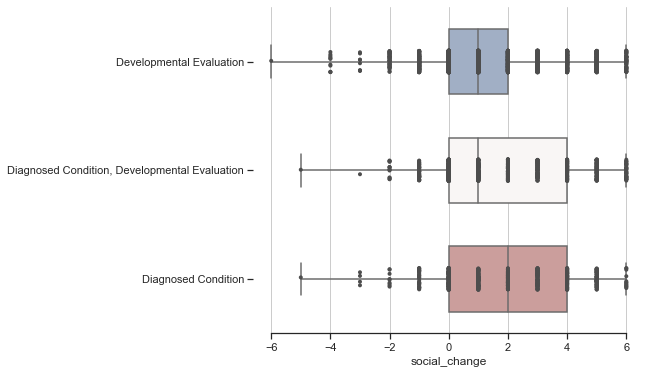

In [24]:
sns.set_theme(style='ticks')

f, ax = plt.subplots(figsize=(7, 6))

sns.boxplot(x = 'social_change', y='elig_cat', data=graph1,
           whis=[0,100], width=.6, palette='vlag')
sns.stripplot(x= 'social_change', y= 'elig_cat', data= graph1,
             size=4, color= '.3', linewidth=0)
ax.xaxis.grid(True)
ax.set(ylabel='')
sns.despine(trim=True, left=True)


In [25]:
pie1 = pd.DataFrame(outer_m2_ec,
                   columns=('social_change','elig_cat'))

pie1


,social_change,elig_cat
elig_cat,,
Developmental Evaluation,4172,NaN
Diagnosed Condition,681,NaN
"Diagnosed Condition, Developmental Evaluation",864,NaN


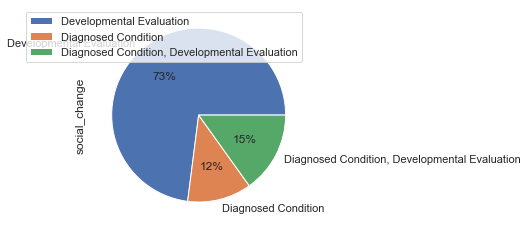

In [27]:
pie1 = outer_m2.groupby(['elig_cat']).count().plot(kind='pie', y='social_change',
autopct='%1.0f%%')

In [30]:
outer_m2_kc = outer_m2.groupby(['knowledge_change']).count()
display(outer_m2_kc)

,child_id,district,month_count,ent_social,ent_knowledge,ent_app_action,exit_social,exit_knowledge,exit_app_action,elig_cat,OC1 Data Check,social_change,app_action_change
knowledge_change,,,,,,,,,,,,,
-4.0,79,79,79,79,79,79,79,79,79,79,79,79,79
-3.0,126,126,126,126,126,126,126,126,126,126,126,126,126
-2.0,424,424,424,424,424,424,424,424,424,424,424,424,424
-1.0,687,687,687,687,687,687,687,687,687,687,687,687,687
0.0,1754,1754,1754,1754,1754,1754,1754,1754,1754,1754,1754,1754,1754
1.0,940,940,940,940,940,940,940,940,940,940,940,940,940
2.0,864,864,864,864,864,864,864,864,864,864,864,864,864
3.0,411,411,411,411,411,411,411,411,411,411,411,411,411
4.0,252,252,252,252,252,252,252,252,252,252,252,252,252


In [35]:
pie2 = pd.DataFrame(outer_m2_kc,
                   columns=('knowledge_change','elig_cat'))

pie2


,knowledge_change,elig_cat
knowledge_change,,
-4.0,NaN,79
-3.0,NaN,126
-2.0,NaN,424
-1.0,NaN,687
0.0,NaN,1754
1.0,NaN,940
2.0,NaN,864
3.0,NaN,411
4.0,NaN,252


In [52]:
objects = (pie2['knowledge_change'])
y_pos = np.arange(len(objects))
performance = [10,8,6,-4,2,1]

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Usage')
plt.title('Programming language usage')

plt.show()

KeyError: 'knowledge_change'